# Perspectives on Research
## Homework 01

### Initial Setup
#### Imports

In [61]:
#General
import numpy as np
import pandas as pd
import random

#Machine Learning
from sklearn.model_selection import train_test_split

#Deep Learning
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import regularizers


#Tensor Flow
import tensorflow as tf
                    
#Visualization
import matplotlib.pyplot as plt
    
    

In [62]:
#Set Seed
SEED= 1234
import random
random.seed(SEED)

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# preprocess data to 2D tensors
# convert to float and make the values between 0 and 1
X_train_full = X_train_full.reshape([60000, 28*28]).astype('float32') / 255
X_test = X_test.reshape([10000, 28*28]).astype('float32') / 255
# preprocess outcome variable to lie between 0 and 1
y_train_full = to_categorical(y_train_full)
y_test= to_categorical(y_test)

#Splitting Training Data into Validation and Training
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=10000, random_state=SEED)

In [67]:
#Initial Model
baseline_model = Sequential()
#Setting up 5 layers
baseline_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(10, activation='softmax'))
baseline_model.compile(optimizer='rmsprop', 
                       loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
baseline_history = baseline_model.fit(X_train,
                              y_train,
                              epochs=200,
                              batch_size=512,
                              validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.8448 - acc: 0.6921 - val_loss: 0.7925 - val_acc: 0.7128
Epoch 2/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.5220 - acc: 0.8092 - val_loss: 0.5635 - val_acc: 0.7870
Epoch 3/200
50000/50000 [==============================] - 6s 128us/step - loss: 0.4339 - acc: 0.8399 - val_loss: 0.4232 - val_acc: 0.8372
Epoch 4/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.3896 - acc: 0.8556 - val_loss: 0.3980 - val_acc: 0.8482
Epoch 5/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.3555 - acc: 0.8678 - val_loss: 0.3828 - val_acc: 0.8560
Epoch 6/200
50000/50000 [==============================] - 8s 151us/step - loss: 0.3336 - acc: 0.8767 - val_loss: 0.3416 - val_acc: 0.8711
Epoch 7/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.3090 - acc: 0.8838 - val_loss: 0.

KeyboardInterrupt: 

In [66]:
val_acc = baseline_history.history['val_acc']
val_loss = baseline_history.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.title('The validation set accuracy versus loss over 200 epochs')
plt.show()


NameError: name 'baseline_history' is not defined

In [73]:
#Model with Dropout
dropout_model = Sequential()
dropout_model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
result_dropout = dropout_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=512)

In [ ]:
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('Comparison of Baseline and Dropout Model for Loss & Accuracy')
plt.show()

We see here that the accuracy on the validation set is almost identical for both the model with and without the dropout option. However, the dropout model fares far better on loss, which rises much less over epochs than for the baseline model. 

### Regularization Models

In [83]:
#L1 Regularization
model_L1 = Sequential()
model_L1.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(10, activation='softmax'))
model_L1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_L1 = model_L1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 176us/step - loss: 14.6816 - acc: 0.5417 - val_loss: 4.1789 - val_acc: 0.6272
Epoch 2/200
50000/50000 [==============================] - 10s 205us/step - loss: 3.0972 - acc: 0.6509 - val_loss: 2.4645 - val_acc: 0.6545
Epoch 3/200
50000/50000 [==============================] - 10s 191us/step - loss: 2.2172 - acc: 0.7005 - val_loss: 2.0203 - val_acc: 0.7165
Epoch 4/200
50000/50000 [==============================] - 9s 180us/step - loss: 1.9076 - acc: 0.7309 - val_loss: 1.8268 - val_acc: 0.7154
Epoch 5/200
50000/50000 [==============================] - 10s 191us/step - loss: 1.7521 - acc: 0.7500 - val_loss: 1.7095 - val_acc: 0.7593
Epoch 6/200
50000/50000 [==============================] - 10s 199us/step - loss: 1.6682 - acc: 0.7626 - val_loss: 1.5987 - val_acc: 0.7757
Epoch 7/200
50000/50000 [==============================] - 9s 186us/step - loss: 1.6041 - acc: 0.7724 - val_los

50000/50000 [==============================] - 7s 146us/step - loss: 1.2148 - acc: 0.8380 - val_loss: 1.2355 - val_acc: 0.8336
Epoch 60/200
50000/50000 [==============================] - 7s 149us/step - loss: 1.2148 - acc: 0.8389 - val_loss: 1.2257 - val_acc: 0.8357
Epoch 61/200
50000/50000 [==============================] - 7s 146us/step - loss: 1.2127 - acc: 0.8415 - val_loss: 1.2720 - val_acc: 0.8118
Epoch 62/200
50000/50000 [==============================] - 7s 149us/step - loss: 1.2100 - acc: 0.8412 - val_loss: 1.2637 - val_acc: 0.8183
Epoch 63/200
50000/50000 [==============================] - 8s 152us/step - loss: 1.2096 - acc: 0.8402 - val_loss: 1.2587 - val_acc: 0.8222
Epoch 64/200
50000/50000 [==============================] - 8s 158us/step - loss: 1.2080 - acc: 0.8399 - val_loss: 1.2151 - val_acc: 0.8437
Epoch 65/200
50000/50000 [==============================] - 8s 160us/step - loss: 1.2070 - acc: 0.8409 - val_loss: 1.2674 - val_acc: 0.8191
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 8s 157us/step - loss: 1.1450 - acc: 0.8496 - val_loss: 1.1756 - val_acc: 0.8395
Epoch 176/200
50000/50000 [==============================] - 8s 157us/step - loss: 1.1439 - acc: 0.8504 - val_loss: 1.1761 - val_acc: 0.8389
Epoch 177/200
50000/50000 [==============================] - 8s 163us/step - loss: 1.1466 - acc: 0.8500 - val_loss: 1.2452 - val_acc: 0.8079
Epoch 178/200
50000/50000 [==============================] - 8s 165us/step - loss: 1.1489 - acc: 0.8484 - val_loss: 1.1784 - val_acc: 0.8356
Epoch 179/200
50000/50000 [==============================] - 8s 161us/step - loss: 1.1443 - acc: 0.8516 - val_loss: 1.1825 - val_acc: 0.8378
Epoch 180/200
50000/50000 [==============================] - 8s 158us/step - loss: 1.1450 - acc: 0.8502 - val_loss: 1.1605 - val_acc: 0.8452
Epoch 181/200
50000/50000 [==============================] - 8s 163us/step - loss: 1.1449 - acc: 0.8515 - val_loss: 1.1701 - val_acc: 0.8422
Epoch 182/200
50000/50000 [

In [86]:
model_L2 = Sequential()
model_L2.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(10, activation='softmax'))
model_L2.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])
result_L2 = model_L2.fit(X_train, y_train, 
                         validation_data=(X_valid, y_valid), 
                         epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 146us/step - loss: 2.1672 - acc: 0.6712 - val_loss: 1.4058 - val_acc: 0.7653
Epoch 2/200
50000/50000 [==============================] - 7s 140us/step - loss: 1.1873 - acc: 0.7877 - val_loss: 1.1427 - val_acc: 0.7661
Epoch 3/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.8929 - acc: 0.8143 - val_loss: 1.0313 - val_acc: 0.7682
Epoch 4/200
50000/50000 [==============================] - 7s 147us/step - loss: 0.7471 - acc: 0.8283 - val_loss: 0.8378 - val_acc: 0.8068
Epoch 5/200
50000/50000 [==============================] - 7s 145us/step - loss: 0.6756 - acc: 0.8330 - val_loss: 0.6692 - val_acc: 0.8295
Epoch 6/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.6222 - acc: 0.8411 - val_loss: 0.6090 - val_acc: 0.8403
Epoch 7/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.5835 - acc: 0.8473 - val_loss: 0.

50000/50000 [==============================] - 7s 133us/step - loss: 0.3280 - acc: 0.9131 - val_loss: 0.4221 - val_acc: 0.8811
Epoch 118/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3303 - acc: 0.9128 - val_loss: 0.4457 - val_acc: 0.8814
Epoch 119/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.3313 - acc: 0.9118 - val_loss: 0.4652 - val_acc: 0.8730
Epoch 120/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3270 - acc: 0.9156 - val_loss: 0.4072 - val_acc: 0.8896
Epoch 121/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3276 - acc: 0.9141 - val_loss: 0.5834 - val_acc: 0.8260
Epoch 122/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.3292 - acc: 0.9138 - val_loss: 0.4083 - val_acc: 0.8888
Epoch 123/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3228 - acc: 0.9154 - val_loss: 0.4851 - val_acc: 0.8562
Epoch 124/200
50000/50000 [

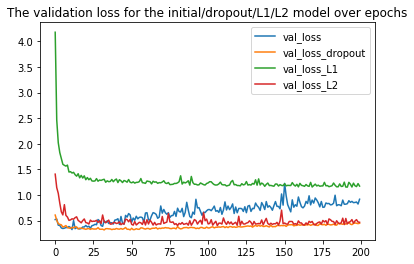

In [88]:
val_loss = baseline_history.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_L1 = result_L1.history['val_loss']
val_loss_L2 = result_L2.history['val_loss']
plt.plot(val_loss)
plt.plot(val_loss_dropout)
plt.plot(val_loss_L1)
plt.plot(val_loss_L2)
plt.legend(['val_loss', 'val_loss_dropout', 'val_loss_L1', 'val_loss_L2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

From a cursory visual inspection, the Dropout model seems to perform best by virtue of having the lowest loss, which seems to stay roughly stable across epochs. 

### Alternative Models
We will use 12 alternative models, focusing on the number of layers as our key parameter:
1) Varying the number of layers for all the 4 models explored above- baseline, dropout, using L1 & L2
a) With 4 layers (less than baseline)
b) With 3 layers (less than baseline)
c) With 6 layers (more than baseline)

In [9]:
# We will keep adding the history
alt_models = []

In [25]:
def plot_loss(model):
    #legend_titles = []    
    plt.plot(model.history['val_loss'])

### Baseline Models (no dropout or regularization)

In [36]:
# 3 layers
alt_model_baseline3 = Sequential()
alt_model_baseline3.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_baseline3.add(Dense(512, activation='relu'))
alt_model_baseline3.add(Dense(10, activation='softmax'))
alt_model_baseline3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_3 = alt_model_baseline3.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 83us/step - loss: 0.7338 - acc: 0.7373 - val_loss: 0.4868 - val_acc: 0.8212
Epoch 2/100
 7680/50000 [===>..........................] - ETA: 2s - loss: 0.4980 - acc: 0.8182

KeyboardInterrupt: 

In [6]:
# 4 Layers
alt_model_baseline4 = Sequential()
alt_model_baseline4.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_baseline4.add(Dense(512, activation='relu'))
alt_model_baseline4.add(Dense(512, activation='relu'))
alt_model_baseline4.add(Dense(10, activation='softmax'))
alt_model_baseline4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_4 = alt_model_baseline4.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.7839 - acc: 0.7205 - val_loss: 0.5695 - val_acc: 0.7790
Epoch 2/100
50000/50000 [==============================] - 5s 96us/step - loss: 0.4955 - acc: 0.8150 - val_loss: 0.4314 - val_acc: 0.8356
Epoch 3/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.4155 - acc: 0.8425 - val_loss: 0.4224 - val_acc: 0.8430
Epoch 4/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.3691 - acc: 0.8606 - val_loss: 0.4423 - val_acc: 0.8321
Epoch 5/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3454 - acc: 0.8710 - val_loss: 0.4433 - val_acc: 0.8277
Epoch 6/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.3184 - acc: 0.8800 - val_loss: 0.3869 - val_acc: 0.8603
Epoch 7/100
50000/50000 [==============================] - 6s 129us/step - loss: 0.3032 - acc: 0.8848 - val_loss: 0.3

50000/50000 [==============================] - 6s 123us/step - loss: 0.0790 - acc: 0.9728 - val_loss: 0.6441 - val_acc: 0.9000
Epoch 60/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.0769 - acc: 0.9717 - val_loss: 0.6288 - val_acc: 0.8934
Epoch 61/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.0830 - acc: 0.9732 - val_loss: 0.6103 - val_acc: 0.8983
Epoch 62/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.0771 - acc: 0.9731 - val_loss: 0.6564 - val_acc: 0.8967
Epoch 63/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.0755 - acc: 0.9737 - val_loss: 0.6161 - val_acc: 0.8843
Epoch 64/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.0741 - acc: 0.9745 - val_loss: 0.5946 - val_acc: 0.8980
Epoch 65/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.0728 - acc: 0.9754 - val_loss: 0.6511 - val_acc: 0.8901
Epoch 66/100
50000/50000 [=======

In [8]:
# 6 layers
alt_model_baseline6 = Sequential()
alt_model_baseline6.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_baseline6.add(Dense(512, activation='relu'))
alt_model_baseline6.add(Dense(512, activation='relu'))
alt_model_baseline6.add(Dense(512, activation='relu'))
alt_model_baseline6.add(Dense(512, activation='relu'))
alt_model_baseline6.add(Dense(10, activation='softmax'))
alt_model_baseline6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_6 = alt_model_baseline6.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.9460 - acc: 0.6572 - val_loss: 0.5244 - val_acc: 0.7910
Epoch 2/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.5533 - acc: 0.7983 - val_loss: 0.4589 - val_acc: 0.8311
Epoch 3/100
50000/50000 [==============================] - 10s 202us/step - loss: 0.4501 - acc: 0.8315 - val_loss: 0.5013 - val_acc: 0.8053
Epoch 4/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.4044 - acc: 0.8490 - val_loss: 0.4452 - val_acc: 0.8237
Epoch 5/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.3693 - acc: 0.8636 - val_loss: 0.3958 - val_acc: 0.8530
Epoch 6/100
50000/50000 [==============================] - 8s 163us/step - loss: 0.3440 - acc: 0.8716 - val_loss: 0.4776 - val_acc: 0.8405
Epoch 7/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.3313 - acc: 0.8768 - val_loss: 0

Epoch 59/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.1310 - acc: 0.9550 - val_loss: 0.4800 - val_acc: 0.8995
Epoch 60/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.1219 - acc: 0.9569 - val_loss: 0.5116 - val_acc: 0.8990
Epoch 61/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.1263 - acc: 0.9576 - val_loss: 0.5568 - val_acc: 0.8945
Epoch 62/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.1187 - acc: 0.9572 - val_loss: 0.5382 - val_acc: 0.8994
Epoch 63/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.1248 - acc: 0.9570 - val_loss: 0.5351 - val_acc: 0.8672
Epoch 64/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.1309 - acc: 0.9574 - val_loss: 0.4861 - val_acc: 0.9002
Epoch 65/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.1305 - acc: 0.9574 - val_loss: 0.4555 - val_acc: 0.8971
Epoch 66/100
50000/5

### Dropout Models

In [10]:
alt_model_drop3 = Sequential()
alt_model_drop3.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_drop3.add(Dropout(0.5))
alt_model_drop3.add(Dense(512, activation='relu'))
alt_model_drop3.add(Dropout(0.5))
alt_model_drop3.add(Dense(10, activation='softmax'))
alt_model_drop3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_drop3 = alt_model_drop3.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_drop3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.7985 - acc: 0.7114 - val_loss: 0.5148 - val_acc: 0.8026
Epoch 2/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.5182 - acc: 0.8124 - val_loss: 0.4492 - val_acc: 0.8335
Epoch 3/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.4596 - acc: 0.8331 - val_loss: 0.4204 - val_acc: 0.8428
Epoch 4/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.4234 - acc: 0.8454 - val_loss: 0.3960 - val_acc: 0.8523
Epoch 5/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.4020 - acc: 0.8539 - val_loss: 0.3898 - val_acc: 0.8536
Epoch 6/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.3804 - acc: 0.8621 - val_loss: 0.3596 - val_acc: 0.8670
Epoch 7/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.3717 - acc: 0.8648 - val_loss: 0.4389 -

50000/50000 [==============================] - 5s 101us/step - loss: 0.2190 - acc: 0.9192 - val_loss: 0.3292 - val_acc: 0.8968
Epoch 60/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.2160 - acc: 0.9204 - val_loss: 0.3322 - val_acc: 0.8987
Epoch 61/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.2154 - acc: 0.9212 - val_loss: 0.3405 - val_acc: 0.8969
Epoch 62/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.2130 - acc: 0.9227 - val_loss: 0.3669 - val_acc: 0.8916
Epoch 63/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.2117 - acc: 0.9233 - val_loss: 0.3409 - val_acc: 0.8972
Epoch 64/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.2139 - acc: 0.9223 - val_loss: 0.3450 - val_acc: 0.8953
Epoch 65/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.2089 - acc: 0.9229 - val_loss: 0.3490 - val_acc: 0.8966
Epoch 66/100
50000/50000 [===========

In [12]:
alt_model_drop4 = Sequential()
alt_model_drop4.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_drop4.add(Dropout(0.5))
alt_model_drop4.add(Dense(512, activation='relu'))
alt_model_drop4.add(Dropout(0.5))
alt_model_drop4.add(Dense(512, activation='relu'))
alt_model_drop4.add(Dropout(0.5))
alt_model_drop4.add(Dense(10, activation='softmax'))
alt_model_drop4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_drop4 = alt_model_drop4.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_drop4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.8703 - acc: 0.6815 - val_loss: 0.6119 - val_acc: 0.7660
Epoch 2/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5487 - acc: 0.8007 - val_loss: 0.5201 - val_acc: 0.7899
Epoch 3/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.4844 - acc: 0.8247 - val_loss: 0.4267 - val_acc: 0.8400
Epoch 4/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.4468 - acc: 0.8388 - val_loss: 0.3995 - val_acc: 0.8561
Epoch 5/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.4231 - acc: 0.8477 - val_loss: 0.4142 - val_acc: 0.8376
Epoch 6/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.4049 - acc: 0.8525 - val_loss: 0.3994 - val_acc: 0.8502
Epoch 7/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.3922 - acc: 0.8574 - val_loss: 0.

50000/50000 [==============================] - 7s 142us/step - loss: 0.2535 - acc: 0.9123 - val_loss: 0.3234 - val_acc: 0.8914
Epoch 60/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.2466 - acc: 0.9113 - val_loss: 0.3284 - val_acc: 0.8910
Epoch 61/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.2505 - acc: 0.9112 - val_loss: 0.3514 - val_acc: 0.8824
Epoch 62/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.2474 - acc: 0.9114 - val_loss: 0.3287 - val_acc: 0.8937
Epoch 63/100
50000/50000 [==============================] - 7s 143us/step - loss: 0.2456 - acc: 0.9135 - val_loss: 0.3592 - val_acc: 0.8830
Epoch 64/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.2466 - acc: 0.9130 - val_loss: 0.3327 - val_acc: 0.8902
Epoch 65/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.2430 - acc: 0.9144 - val_loss: 0.3339 - val_acc: 0.8963
Epoch 66/100
50000/50000 [=======

In [14]:
alt_model_drop6 = Sequential()
alt_model_drop6.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
alt_model_drop6.add(Dropout(0.5))
alt_model_drop6.add(Dense(512, activation='relu'))
alt_model_drop6.add(Dropout(0.5))
alt_model_drop6.add(Dense(512, activation='relu'))
alt_model_drop6.add(Dropout(0.5))
alt_model_drop6.add(Dense(512, activation='relu'))
alt_model_drop6.add(Dropout(0.5))
alt_model_drop6.add(Dense(10, activation='softmax'))
alt_model_drop6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_drop6 = alt_model_drop6.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_drop6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.9816 - acc: 0.6343 - val_loss: 0.6116 - val_acc: 0.7708
Epoch 2/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.5967 - acc: 0.7867 - val_loss: 0.4691 - val_acc: 0.8256
Epoch 3/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.5055 - acc: 0.8208 - val_loss: 0.4689 - val_acc: 0.8278
Epoch 4/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.4814 - acc: 0.8301 - val_loss: 0.4303 - val_acc: 0.8364
Epoch 5/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.4426 - acc: 0.8422 - val_loss: 0.4218 - val_acc: 0.8377
Epoch 6/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.4352 - acc: 0.8450 - val_loss: 0.4277 - val_acc: 0.8384
Epoch 7/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.4114 - acc: 0.8517 - val_loss: 0.

50000/50000 [==============================] - 8s 168us/step - loss: 0.2992 - acc: 0.9013 - val_loss: 0.3432 - val_acc: 0.8894
Epoch 60/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.2871 - acc: 0.9020 - val_loss: 0.3531 - val_acc: 0.8867
Epoch 61/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.2919 - acc: 0.9031 - val_loss: 0.3428 - val_acc: 0.8927c: 0 - ETA: 3s - loss: 0.2941 - acc: - ETA:
Epoch 62/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.2972 - acc: 0.8999 - val_loss: 0.3367 - val_acc: 0.8878
Epoch 63/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.2894 - acc: 0.9025 - val_loss: 0.3334 - val_acc: 0.8880
Epoch 64/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.2857 - acc: 0.9051 - val_loss: 0.3548 - val_acc: 0.8807
Epoch 65/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.2897 - acc: 0.9031 - val_loss: 0.3424 - val_ac

### L1 Regularization

In [15]:
alt_model_l1_3 = Sequential()
alt_model_l1_3.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
alt_model_l1_3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
alt_model_l1_3.add(Dense(10, activation='softmax'))
alt_model_l1_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1_3 = alt_model_l1_3.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_l1_3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 98us/step - loss: 8.9630 - acc: 0.6667 - val_loss: 2.8797 - val_acc: 0.7259
Epoch 2/100
50000/50000 [==============================] - 4s 76us/step - loss: 2.1294 - acc: 0.7438 - val_loss: 1.6557 - val_acc: 0.7697
Epoch 3/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.4966 - acc: 0.7732 - val_loss: 1.4091 - val_acc: 0.7774
Epoch 4/100
50000/50000 [==============================] - 4s 90us/step - loss: 1.3126 - acc: 0.7868 - val_loss: 1.2530 - val_acc: 0.7973
Epoch 5/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.2121 - acc: 0.7997 - val_loss: 1.2197 - val_acc: 0.7855
Epoch 6/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.1471 - acc: 0.8087 - val_loss: 1.1889 - val_acc: 0.7767
Epoch 7/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.1018 - acc: 0.8152 - val_loss: 1.1162 - 

50000/50000 [==============================] - 4s 82us/step - loss: 0.8799 - acc: 0.8516 - val_loss: 0.8987 - val_acc: 0.8420
Epoch 60/100
50000/50000 [==============================] - 4s 83us/step - loss: 0.8812 - acc: 0.8494 - val_loss: 0.9720 - val_acc: 0.8183
Epoch 61/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.8766 - acc: 0.8510 - val_loss: 0.9114 - val_acc: 0.8347
Epoch 62/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.8791 - acc: 0.8519 - val_loss: 0.9571 - val_acc: 0.8118
Epoch 63/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.8800 - acc: 0.8501 - val_loss: 0.8973 - val_acc: 0.8418
Epoch 64/100
50000/50000 [==============================] - 5s 96us/step - loss: 0.8775 - acc: 0.8520 - val_loss: 0.8961 - val_acc: 0.8411
Epoch 65/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.8756 - acc: 0.8519 - val_loss: 0.9152 - val_acc: 0.8360
Epoch 66/100
50000/50000 [==============

In [16]:
alt_model_l1_4 = Sequential()
alt_model_l1_4.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
alt_model_l1_4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
alt_model_l1_4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
alt_model_l1_4.add(Dense(10, activation='softmax'))
alt_model_l1_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1_4 = alt_model_l1_4.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_l1_4)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 124us/step - loss: 11.9363 - acc: 0.6170 - val_loss: 3.7567 - val_acc: 0.5999
Epoch 2/100
50000/50000 [==============================] - 6s 116us/step - loss: 2.6937 - acc: 0.6931 - val_loss: 2.1918 - val_acc: 0.6692
Epoch 3/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.9394 - acc: 0.7241 - val_loss: 1.7878 - val_acc: 0.7155
Epoch 4/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.6841 - acc: 0.7469 - val_loss: 1.7366 - val_acc: 0.6877
Epoch 5/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.5469 - acc: 0.7606 - val_loss: 1.4918 - val_acc: 0.7784
Epoch 6/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.4693 - acc: 0.7726 - val_loss: 1.4258 - val_acc: 0.7884
Epoch 7/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.4145 - acc: 0.7813 - val_loss: 1

50000/50000 [==============================] - 7s 130us/step - loss: 1.0598 - acc: 0.8426 - val_loss: 1.0715 - val_acc: 0.8379
Epoch 60/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.0548 - acc: 0.8446 - val_loss: 1.0812 - val_acc: 0.8337
Epoch 61/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.0542 - acc: 0.8431 - val_loss: 1.0970 - val_acc: 0.8285
Epoch 62/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.0486 - acc: 0.8456 - val_loss: 1.0701 - val_acc: 0.8368
Epoch 63/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.0526 - acc: 0.8446 - val_loss: 1.0741 - val_acc: 0.8369
Epoch 64/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.0504 - acc: 0.8464 - val_loss: 1.0981 - val_acc: 0.8260
Epoch 65/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.0474 - acc: 0.8470 - val_loss: 1.0734 - val_acc: 0.8370
Epoch 66/100
50000/50000 [=======

### L2 Regularization

In [17]:
# 3 layers
#The Regularization is not applied in the first layer
alt_model_l2_3 = Sequential()
alt_model_l2_3.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
alt_model_l2_3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
alt_model_l2_3.add(Dense(10, activation='softmax'))
alt_model_l2_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2_3 = alt_model_l2_3.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_l2_3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 109us/step - loss: 6.1360 - acc: 0.6835 - val_loss: 2.6970 - val_acc: 0.6857
Epoch 2/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.9051 - acc: 0.7443 - val_loss: 1.4130 - val_acc: 0.7855
Epoch 3/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.3121 - acc: 0.7726 - val_loss: 1.1747 - val_acc: 0.7916
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 1.0903 - acc: 0.7939 - val_loss: 1.0357 - val_acc: 0.7991
Epoch 5/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.9935 - acc: 0.8045 - val_loss: 1.0188 - val_acc: 0.7871
Epoch 6/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.9301 - acc: 0.8149 - val_loss: 1.0276 - val_acc: 0.7772
Epoch 7/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.8923 - acc: 0.8199 - val_loss: 0.8721 

50000/50000 [==============================] - 4s 81us/step - loss: 0.6914 - acc: 0.8612 - val_loss: 0.7475 - val_acc: 0.8423
Epoch 60/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.6906 - acc: 0.8613 - val_loss: 0.7540 - val_acc: 0.8385
Epoch 61/100
50000/50000 [==============================] - 4s 81us/step - loss: 0.6907 - acc: 0.8608 - val_loss: 0.8002 - val_acc: 0.8273
Epoch 62/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.6902 - acc: 0.8615 - val_loss: 0.7245 - val_acc: 0.8474
Epoch 63/100
50000/50000 [==============================] - 4s 81us/step - loss: 0.6912 - acc: 0.8622 - val_loss: 0.7552 - val_acc: 0.8379
Epoch 64/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.6891 - acc: 0.8619 - val_loss: 0.7280 - val_acc: 0.8497
Epoch 65/100
50000/50000 [==============================] - 4s 79us/step - loss: 0.6889 - acc: 0.8615 - val_loss: 0.7158 - val_acc: 0.8518
Epoch 66/100
50000/50000 [==============

In [ ]:
print(alt_model)

In [18]:
#4 layers
#The Regularization is not applied in the first layer
alt_model_l2_4 = Sequential()
alt_model_l2_4.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
alt_model_l2_4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
alt_model_l2_4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
alt_model_l2_4.add(Dense(10, activation='softmax'))
alt_model_l2_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2_4 = alt_model_l2_4.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs=100, batch_size=512)
alt_models.append(result_l2_4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/step - loss: 6.5859 - acc: 0.6472 - val_loss: 3.0104 - val_acc: 0.6892oss: 7.371
Epoch 2/100
50000/50000 [==============================] - 6s 111us/step - loss: 2.2347 - acc: 0.7286 - val_loss: 1.6474 - val_acc: 0.7722
Epoch 3/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.5287 - acc: 0.7578 - val_loss: 1.3409 - val_acc: 0.7563
Epoch 4/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.2200 - acc: 0.7805 - val_loss: 1.1504 - val_acc: 0.7838
Epoch 5/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.0703 - acc: 0.7957 - val_loss: 1.1171 - val_acc: 0.7662
Epoch 6/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.9858 - acc: 0.8062 - val_loss: 0.9550 - val_acc: 0.8112
Epoch 7/100
50000/50000 [==============================] - 6s 129us/step - loss: 0.9321 - acc: 0.8112 - va

50000/50000 [==============================] - 7s 143us/step - loss: 0.7181 - acc: 0.8555 - val_loss: 0.7200 - val_acc: 0.8528
Epoch 59/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.7162 - acc: 0.8566 - val_loss: 0.7069 - val_acc: 0.8576
Epoch 60/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.7138 - acc: 0.8570 - val_loss: 0.8140 - val_acc: 0.8228
Epoch 61/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.7149 - acc: 0.8570 - val_loss: 0.7563 - val_acc: 0.8379
Epoch 62/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.7130 - acc: 0.8571 - val_loss: 0.7720 - val_acc: 0.8360
Epoch 63/100
50000/50000 [==============================] - 7s 148us/step - loss: 0.7135 - acc: 0.8579 - val_loss: 0.7488 - val_acc: 0.8413
Epoch 64/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.7137 - acc: 0.8576 - val_loss: 0.7407 - val_acc: 0.8463
Epoch 65/100
50000/50000 [=======

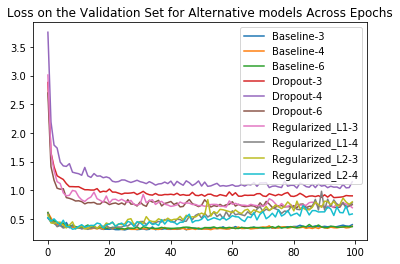

In [47]:
#Combined Plot
for model in alt_models:
    plot_loss(model)

plt.title('Loss on the Validation Set for Alternative models Across Epochs')
plt.legend(['Baseline-3', 'Baseline-4', 'Baseline-6','Dropout-3', 'Dropout-4', 'Dropout-6', 'Regularized_L1-3', 'Regularized_L1-4', 'Regularized_L2-3', 'Regularized_L2-4'])
plt.show()


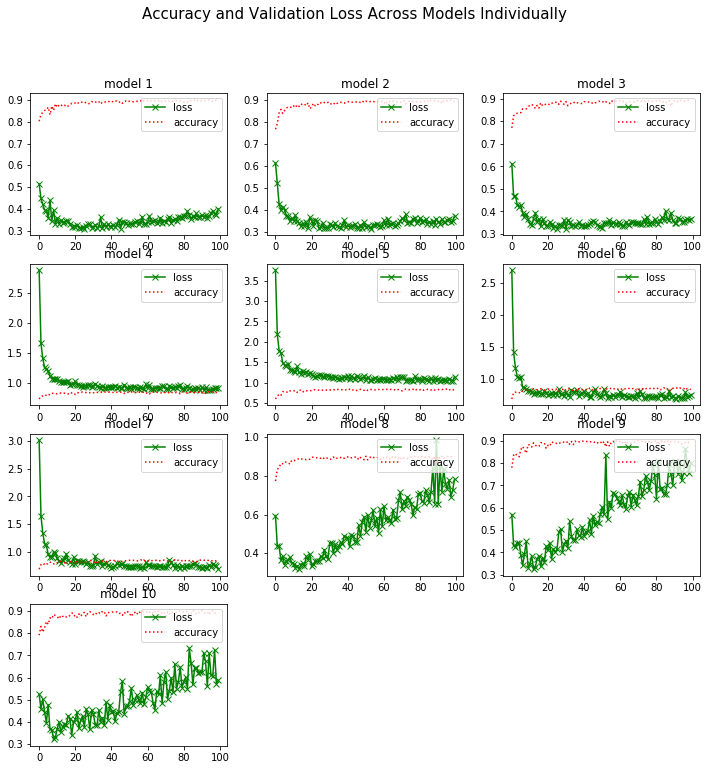

In [63]:
#Individual Plots
fig = plt.figure(figsize=(12,12))
fig.suptitle('Accuracy and Validation Loss Across Models Individually', fontsize=15)
for i in range(1, 11):
    current_model = alt_models[i-1]
    val_loss = current_model.history['val_loss']
    val_acc = current_model.history['val_acc']
    ax = fig.add_subplot(4, 3, i)
    ax.plot(np.arange(len(val_loss)), val_loss, label='loss', marker='x', color='green')
    ax.plot(np.arange(len(val_acc)), val_acc, label='accuracy', linestyle=":", color='red')
    ax.legend(loc="upper right")
    ax.set_title("model {}".format(i))

We can see clear patterns in the behaviour of the models. The baseline models have strongly rising loss, which suggests they are unsuitable. The dropout and regularization models have low loss, but only dropout models have high accuracy. We can infer from these plots that the best performance occurs for Dropout 3- The 3 Layer Model With Dropout. 

In [64]:
#We check for when this model performed the best
def min_loss(result):
    '''
    Find number of epoch that yields the lowest validation loss.
    '''
    min_loss = min(result.history['val_loss'])
    max_acc = max(result.history['val_acc'])
    return min_loss, max_acc

In [65]:
min_loss(result_drop3)

(0.3084603164434433, 0.9003999999046326)

## Final Model

In [29]:
alt_model_drop3.fit(X_train_full, y_train_full, epochs=50, batch_size=512)
alt_model_drop3.evaluate(X_test, y_test)

Epoch 1/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2318 - acc: 0.9229
Epoch 2/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.2311 - acc: 0.9225
Epoch 3/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.2287 - acc: 0.9217
Epoch 4/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2269 - acc: 0.9226
Epoch 5/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.2235 - acc: 0.9229
Epoch 6/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.2197 - acc: 0.9244
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2151 - acc: 0.9268
Epoch 8/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.2189 - acc: 0.9260
Epoch 9/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2198 - acc: 0.9241
Epoch 10/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2134 - acc: 0.926

[0.4547365966528654, 0.8927]

The model does not generalize well.
While the loss does not fall much, (from 90.03% to 89.27%), the loss increases significanttly from 30.84% to 45.47%. 
Some possible reasons for this overfitting may include:
1) Incorrect activation functions (have relied entirely on relu)
2) Insufficiently complex networl architecture